### IMPORT THE DEPENDENCIES

In [2]:
import numpy as np# to make numpy array
import pandas as pd#to create dataframe
import sklearn.datasets#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### DATA COLLECTION AND PREPROCESSING

In [3]:
#Loading the data
#breast_cancer_dataset=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
#breast_cancer_dataset.head(5)
bc=sklearn.datasets.load_breast_cancer()
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#data array--> contains all the values
#target array-->contains all the labels
#feature names--->contains the name of the feature 

### Loading the data as dataframe

In [5]:
df=pd.DataFrame(bc.data,columns=bc.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Adding 'target' column to the DataFrame 

In [6]:
df['label']=bc.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### Statistical Analysis of Data

In [7]:
# no of rows and column
df.shape

(569, 31)

In [8]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### There is no null values

In [9]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### Statistical measures about the Data

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Checking the Distribution of Target Variable(# Diagonosis=#no of malignant(0)', 'benign(1))

In [11]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Number of Benign:  212
Number of Malignant :  357
Percentage of Benign:  37.258347978910365
Number of Malignant :  62.741652021089635


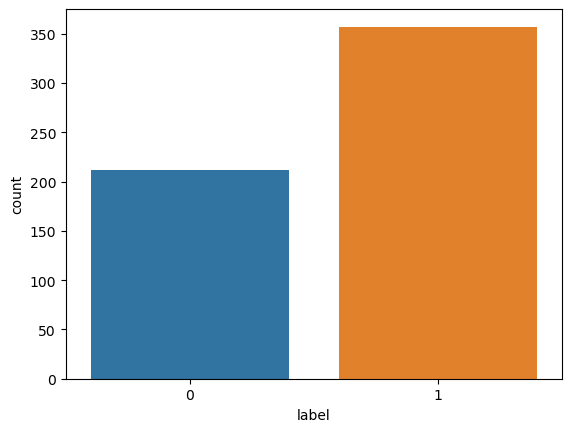

In [13]:
sns.countplot(x='label',data=df)
M,B=df.label.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
print('Percentage of Benign: ',B/(B+M)*100)
print('Number of Malignant : ',M/(B+M)*100)

<AxesSubplot:>

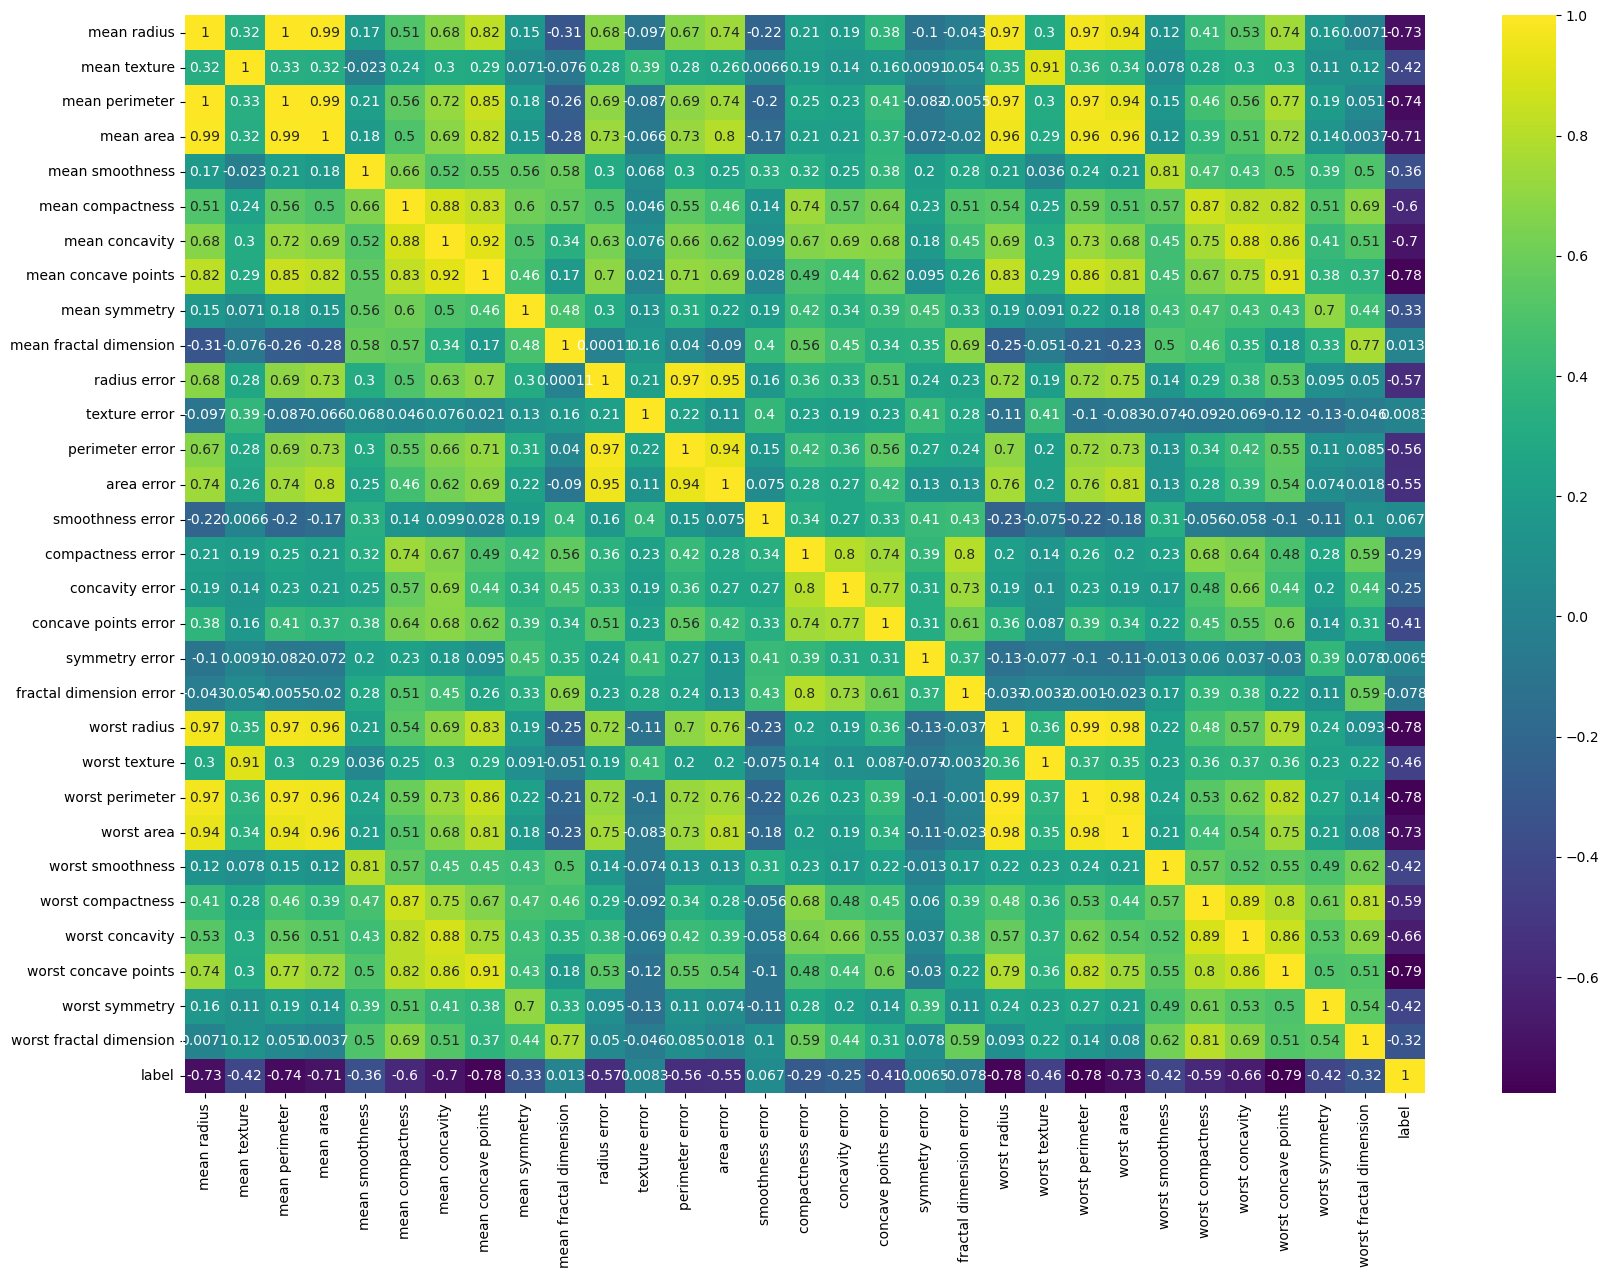

In [14]:
figsize = plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [15]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Separating the Features(X) and target(y)

In [16]:
X=df.drop(columns='label',axis=1)
y=df['label']
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


### Splitting the data into Training and testing data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Model Training

#### Logistic Regression

In [20]:
model=LogisticRegression()

In [21]:
#Training Logistic regression modelling using Training Data
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#### Model Evaluation

#### Accuracy Score

In [22]:
#accuracy on training data
X_train_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_pred)
print("Acuuracy on training data=",training_data_accuracy)

Acuuracy on training data= 0.9494505494505494


In [23]:
#Accuracy on test data
X_test_pred=model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_pred)
print("Acuuracy on test data=",test_data_accuracy)

Acuuracy on test data= 0.9210526315789473


### Building a Predictive system

In [24]:
input_data=(20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for one datapoint;
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction==0):
    print("The Breast cancer is Malignant")
else:
    print("The Brest Cancer is Benign")


[0]
The Breast cancer is Malignant


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


#### Building the Neural Network

In [25]:
#For craeting this Neural Network we need  two libraries (ie)tensorflow,keras

In [26]:
import tensorflow as tf #tensordflow library is a deep learning library developed by google
tf.random.set_seed(3)# how many ever times we run the code we get the same acuuracy
from tensorflow import keras

### Build the layer: input,hidden and output

In [27]:
#Setting up the layers for Neural Network;Sequencial-->stacking the neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),#column
                       keras.layers.Dense(20,activation='relu'),#20-->hidden layer neurons;relu--->rectified linear units
                       keras.layers.Dense(2,activation='sigmoid')])#2-->no of classes(0,1);sigmoid--->logistic regression function


### Compiling the Neural Network

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#loss--->true value-predicted value; sparse is generally used of binary classification
              metrics=['accuracy'])

### Training the neural network

In [30]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10)#validation-->10% of the data is used for test;epochs-->how many times the model has to go thru the data
#history---> storing all the check points of the model

Epoch 1/10
13/13 [==============================] - 1s 30ms/step - loss: 93.1494 - accuracy: 0.3692 - val_loss: 73.3512 - val_accuracy: 0.3478
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 51.6497 - accuracy: 0.3667 - val_loss: 30.6397 - val_accuracy: 0.3043
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 23.9991 - accuracy: 0.2103 - val_loss: 20.1431 - val_accuracy: 0.2391
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 20.6226 - accuracy: 0.1956 - val_loss: 16.8228 - val_accuracy: 0.0870
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 18.6565 - accuracy: 0.1907 - val_loss: 16.9916 - val_accuracy: 0.1739
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 16.6720 - accuracy: 0.1565 - val_loss: 13.9863 - val_accuracy: 0.0435
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 15.1557 - accuracy: 0.1296 - val_loss: 12.4695 - val_accuracy: 0.0435
Epoch

When the Loss value decrease then the accuracy value increases

#### Standard scalar will increase the accuracy of the model

### Standadize the data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)#test data should not be fit; there is no requirement of y_train and y_test as they are already in the form of 0,1(catergorical variable)


#### Visualizing the accuracy and loss

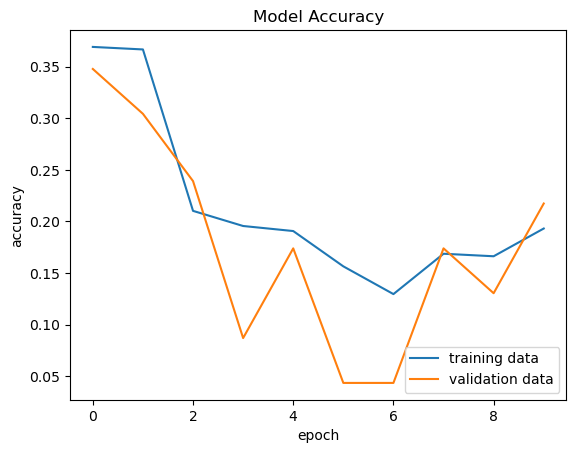

In [33]:
plt.plot(history.history['accuracy'])#
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training data','validation data'],loc='lower right')


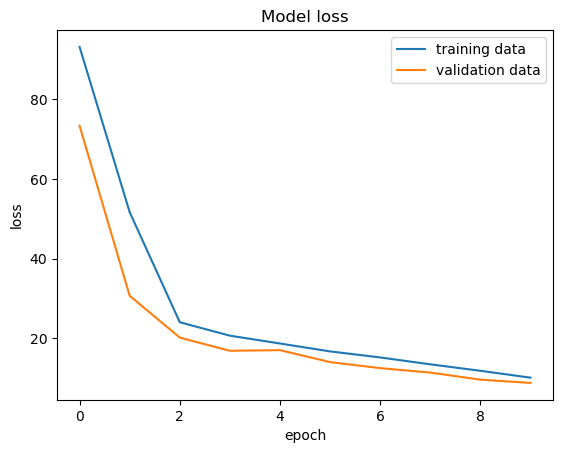

In [34]:
plt.plot(history.history['loss'])#
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data','validation data'],loc='upper right')


#### Accuracy of the model on test data

In [35]:
loss,accuracy=model.evaluate(X_test_std,y_test)# Model takes the standadized x_test data and predict the labels and those labels will be compared with y_test and it will give two values(ie)loss,accurracy
print(accuracy)


4/4 [==============================] - 0s 4ms/step - loss: 1.2545 - accuracy: 0.5000
0.5


In [36]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [37]:
y_pred=model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [38]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.40438867 0.9018348 ]


### Probablity of being 0[Malignant] is 0.399(ie) almost 40% and the Probablity of being 1[Benign] is 0.83 (ie) 83%

In [39]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [40]:
print(y_pred)

[[4.0438867e-01 9.0183479e-01]
 [5.4306024e-01 5.3221321e-01]
 [5.3673577e-01 6.2048304e-01]
 [7.9010250e-03 9.5958418e-01]
 [4.2342529e-01 5.8932722e-01]
 [1.7512321e-01 3.7730581e-01]
 [4.1831702e-01 5.7838947e-01]
 [6.7021906e-01 4.2190984e-01]
 [5.2259755e-01 5.4987943e-01]
 [7.4817920e-01 3.8575599e-01]
 [6.8831408e-01 4.9481857e-01]
 [4.9749058e-01 5.6618762e-01]
 [6.4045542e-01 6.6799289e-01]
 [5.2107632e-01 5.4295313e-01]
 [5.1675880e-01 5.4789913e-01]
 [8.3810806e-01 8.8511509e-01]
 [6.5335864e-01 5.7223684e-01]
 [5.0401920e-01 7.1989053e-01]
 [6.1721343e-01 6.4331669e-01]
 [3.2480501e-02 2.4532175e-01]
 [6.2327445e-03 9.9984467e-01]
 [6.1280322e-01 6.0330164e-01]
 [7.0803559e-01 6.4712495e-01]
 [5.9251487e-01 4.0755403e-01]
 [5.3390676e-01 4.8288238e-01]
 [4.8557368e-01 6.1704385e-01]
 [4.7428709e-01 5.8631831e-01]
 [5.8368814e-01 5.2081913e-01]
 [8.6086893e-01 6.0530722e-01]
 [8.2752287e-01 5.7181489e-01]
 [8.4589857e-01 2.9165128e-01]
 [4.9674997e-01 4.7436932e-01]
 [6.1300

#### For 114 X_test_std data there are 2 predictions with y_pred, saying the percentage of being 0 or 1(label)

### To Convert them to labels instead of probablity values we will use np.argmax"

In [41]:
#model.predict()--> gives the prediction probablity for the datapoint
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


#### Building a Predictive system

In [42]:
input_data=(20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for one datapoint;
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standadizing the input data
input_data_std=scaler.transform(input_data_reshaped )
prediction=model.predict(input_data_std)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==0):
    print("The Tumour is Malignant")
else:
    print("The Tumour is Benign")


1/1 [==============================] - 0s 30ms/step
[[0.72957075 0.940544  ]]
[1]
The Tumour is Benign


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
